<a href="https://colab.research.google.com/github/techthumb1/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/Jason_Robinson_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
df = df.drop(['diagnosis', 'Unnamed: 32'], axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
#Perform K-Means Clustering on the Dataset
#Preproces the categorical data
cat_cols = df.columns[df.dtypes=='object']
cat_cols


Index([], dtype='object')

In [0]:
print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns'),

0 categorical columns
31 numerical columns


(None,)

In [0]:
num_cols = df.columns[df.dtypes!='object']
num_cols

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [0]:
from sklearn.datasets.samples_generator import make_blobs

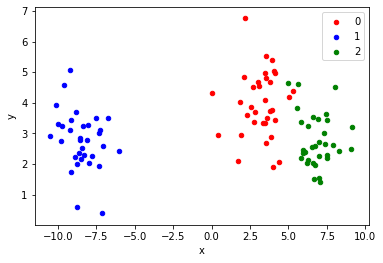

In [0]:
#Plot the cluster of data points 
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
dF = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

colors = {0:'red', 1:'blue', 2:'green'}
fig,ax = plt.subplots()
grouped = dF.groupby('label')
for key, group in grouped:
  group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key]);

In [0]:
#Dataframe of the clusters
dF.head()

,x,y,label
0,-8.321801,2.293932,1
1,-9.593167,4.569398,1
2,3.520531,2.674819,0
3,2.186728,6.782390,0
4,-7.129416,0.393885,1


In [0]:
#Check our dtypes to ensure that we are not dealing with any categorical data
df.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [0]:
df.isnull().sum().any()

False

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
#Duplicate the dataframe 
df_processed = df.copy()
print(df_processed.shape)
df_processed.head()

(569, 31)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
#Instantiate the and stadardize data using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_processed = scaler.fit_transform(df_processed)
print(df_processed.mean())
df_processed.std()

3.4240111423328146e-18


1.0

In [0]:
#Apply PCA to the data
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_features = pca.fit_transform(df_processed)

In [0]:
#Want to know how much did each component  of our 10 clusters varied.
pca.explained_variance_ratio_

array([0.42864701, 0.18376792, 0.09146436, 0.06391475, 0.05318759,
       0.03982815, 0.0315572 , 0.02166945, 0.01486427, 0.01300429])

In [0]:
#What is the total variation.
#We are explaining 94% of the data.
sum(pca.explained_variance_ratio_)

0.9419049919758737

In [0]:
#Now we can see how much data we lost.
#Slightly under 6% of our data is lost.

1-0.9419049919795146

0.058095008020485395

In [0]:
corr = df.corr()
corr['texture_mean']

id                         0.099770
radius_mean                0.323782
texture_mean               1.000000
perimeter_mean             0.329533
area_mean                  0.321086
smoothness_mean           -0.023389
compactness_mean           0.236702
concavity_mean             0.302418
concave points_mean        0.293464
symmetry_mean              0.071401
fractal_dimension_mean    -0.076437
radius_se                  0.275869
texture_se                 0.386358
perimeter_se               0.281673
area_se                    0.259845
smoothness_se              0.006614
compactness_se             0.191975
concavity_se               0.143293
concave points_se          0.163851
symmetry_se                0.009127
fractal_dimension_se       0.054458
radius_worst               0.352573
texture_worst              0.912045
perimeter_worst            0.358040
area_worst                 0.343546
smoothness_worst           0.077503
compactness_worst          0.277830
concavity_worst            0

In [0]:
pd.DataFrame(pca_features).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+00,6.413832e-17,-5.594652e-18,-1.825270e-17,-2.576141e-17,8.632355e-17,2.749165e-17,-1.567378e-17,2.523275e-18,2.933744e-17
1,6.413832e-17,1.000000e+00,1.460338e-16,7.782259e-18,2.303058e-17,-4.811540e-17,2.797763e-17,-1.037315e-17,1.317489e-16,-1.499975e-17
2,-5.594652e-18,1.460338e-16,1.000000e+00,3.490404e-16,2.695055e-16,1.251401e-17,1.217241e-16,1.131036e-18,6.862219e-17,-1.496514e-17
3,-1.825270e-17,7.782259e-18,3.490404e-16,1.000000e+00,-2.965441e-16,2.025940e-16,-2.110627e-16,4.600242e-17,-2.450446e-18,7.903163e-17
4,-2.576141e-17,2.303058e-17,2.695055e-16,-2.965441e-16,1.000000e+00,1.223937e-17,-1.484470e-16,3.110994e-16,-3.161897e-17,-3.341573e-17
5,8.632355e-17,-4.811540e-17,1.251401e-17,2.025940e-16,1.223937e-17,1.000000e+00,-7.792154e-16,9.598321e-17,8.122674e-17,-1.880645e-17
6,2.749165e-17,2.797763e-17,1.217241e-16,-2.110627e-16,-1.484470e-16,-7.792154e-16,1.000000e+00,-5.146012e-16,7.265328e-17,-1.645166e-16
7,-1.567378e-17,-1.037315e-17,1.131036e-18,4.600242e-17,3.110994e-16,9.598321e-17,-5.146012e-16,1.000000e+00,8.487033e-17,-8.848730e-17
8,2.523275e-18,1.317489e-16,6.862219e-17,-2.450446e-18,-3.161897e-17,8.122674e-17,7.265328e-17,8.487033e-17,1.000000e+00,-5.735849e-16
9,2.933744e-17,-1.499975e-17,-1.496514e-17,7.903163e-17,-3.341573e-17,-1.880645e-17,-1.645166e-16,-8.848730e-17,-5.735849e-16,1.000000e+00


In [0]:
#Now we will create a skree plot
#Define the number of components.
num_components = len(pca.explained_variance_ratio_)
num_components

10

In [0]:
#Create an index with a numpy array the len of components
ind = np.arange(num_components)
ind

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
#Create an array of 10 values
vals = pca.explained_variance_ratio_

<BarContainer object of 10 artists>

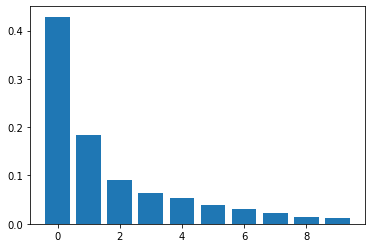

In [0]:
#Plot the variance explained by each component (downward curve).
plt.bar(ind,vals)

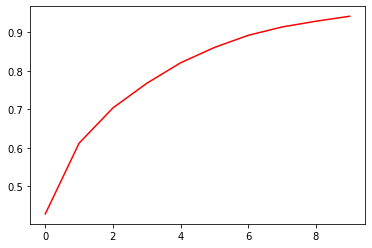

In [0]:
#Plot the cumulative variance explained by ALL components (upward curve).
import matplotlib.pyplot as plt

cumvals = np.cumsum(vals)
plt.plot(ind, cumvals, c='r');

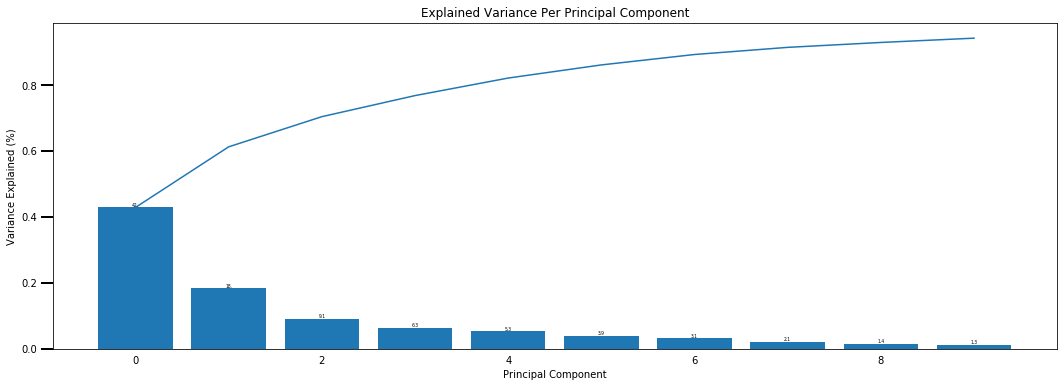

In [0]:
#Define a scree plot function
def scree_plot(pca):
  num_components = len(pca.explained_variance_ratio_)
  ind = np.arange(num_components)
  vals = pca.explained_variance_ratio_

  plt.figure(figsize=(18, 6))
  ax = plt.subplot(111)
  cumvals = np.cumsum(vals)
  ax.bar(ind,vals)
  ax.plot(ind, cumvals)
  for i in range(num_components):
    ax.annotate(r'%s' % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va='bottom', ha='center', fontsize=4.5)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

scree_plot(pca)

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [0]:
##### Your Code Here #####

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project